In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from rouge_score import rouge_scorer
import re, string

In [4]:
# ROUGE-Scorer initialisieren
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Normalisierungsfunktion
def normalize_answer(ans):
    if not isinstance(ans, str):
        return ''
    ans = ans.lower()
    ans = re.sub(f"[{re.escape(string.punctuation)}]", "", ans)
    return ans.strip()

# ROUGE-L Funktion
def rouge_l_score(gt, pred):
    score = scorer.score(gt, pred)
    return score['rougeL'].fmeasure  # Alternativ: .precision oder .recall

# Pfade und Labels für die drei Datensätze
# Pfade und Labels für die drei Datensätze
files = {
    'bs2': '../docs/gemma/gemma_all_models_2_checkpoint.csv',
    'bs4': '../docs/gemma/gemma_all_models_4_checkpoint.csv',
    'bs8': '../docs/gemma/gemma_all_models_8_checkpoint.csv'
}


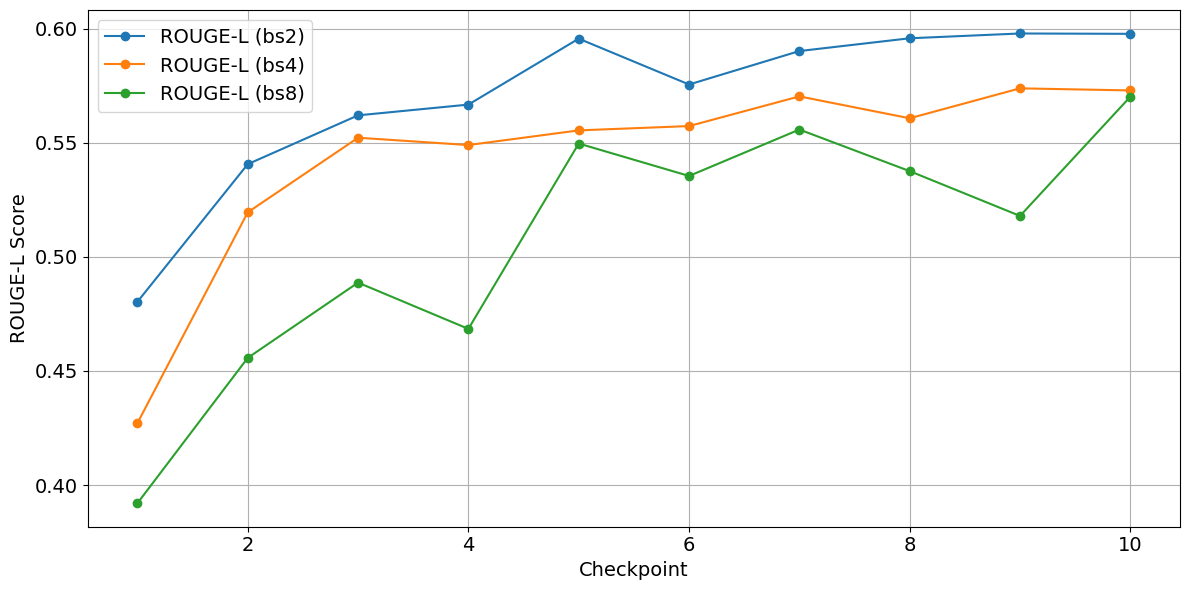

In [8]:
#Plot vorbereiten
plt.figure(figsize=(12, 6))

# Für jede Batch Size den ROUGE-L berechnen und plotten
for label, path in files.items():
    # CSV laden
    data = pd.read_csv(path)

    # Antworten normalisieren
    data['correct_answer'] = data['correct_answer'].apply(normalize_answer)
    data['model_output'] = data['model_output'].apply(normalize_answer)

    # ROUGE-L berechnen
    data['rougeL'] = data.apply(lambda row: rouge_l_score(row['correct_answer'], row['model_output']), axis=1)

    # Mittelwert je Modell berechnen
    model_rouge_summary = data.groupby('model_dir')['rougeL'].mean().reset_index()

    # Checkpoints numerisch sortieren
    model_rouge_summary['checkpoint_num'] = model_rouge_summary['model_dir'].str.extract(r'(\d+)').astype(int)
    model_rouge_summary = model_rouge_summary.sort_values('checkpoint_num')

    # Plotten
    plt.plot(range(1, len(model_rouge_summary) + 1), model_rouge_summary['rougeL'], marker='o', label=f'ROUGE-L ({label})')

# Plot gestalten
plt.xlabel('Checkpoint', fontsize=14)
plt.ylabel('ROUGE-L Score', fontsize=14)
#plt.title('ROUGE-L Vergleich für verschiedene Batch Sizes', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
# Anzeigen
plt.show()